In [1]:
## Measure execution time, becaus Kaggle cloud fluctuates  
import time
start = time.time()

In [2]:
## Importing standard libraries
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
## Importing sklearn libraries

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

In [4]:
## Keras Libraries for Neural Networks

from keras.models import Sequential
from keras.layers import merge
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import PReLU
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [5]:
## Read data from the CSV file
data = pd.read_csv('./input/train.csv')
parent_data = data.copy()    ## Always a good idea to keep a copy of original data
ID = data.pop('id')

In [6]:
data.shape
data.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [7]:
## Since the labels are textual, so we encode them categorically

y = data.pop('species')
y = LabelEncoder().fit(y).transform(y)
print(y.shape)

(990,)


In [8]:
## Most of the learning algorithms are prone to feature scaling
## Standardising the data to give zero mean =)
from sklearn import preprocessing
X = preprocessing.MinMaxScaler().fit(data).transform(data)
X = StandardScaler().fit(data).transform(data)
## normalizing does not help here; l1 and l2 allowed
## X = preprocessing.normalize(data, norm='l1')
print(X.shape)
X

(990, 192)


array([[-0.48661074, -0.13135701, -0.33095592, ..., -0.39487147,
        -0.65214311,  0.26239707],
       [-0.58560191, -0.73488047, -0.02856115, ..., -0.49497401,
         2.18166976,  0.13364087],
       [-0.58560191, -0.48340807, -0.48219201, ..., -0.52001246,
         0.83564129, -0.72463124],
       ...,
       [-0.78358426, -0.63430181, -1.23821765, ...,  0.1807566 ,
        -0.65214311, -0.76756462],
       [-0.88257543, -0.73488047,  0.5762671 , ..., -0.52001246,
        -0.51045972, -0.72463124],
       [ 0.30542003, -0.23196142, -0.02856115, ...,  0.08065405,
         1.18988604,  0.13364087]])

In [9]:
## We will be working with categorical crossentropy function
## It is required to further convert the labels into "one-hot" representation
from keras import utils as np_utils
y_cat = to_categorical(y)
print(y_cat.shape)

(990, 99)


In [10]:
## retain class balances
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2,random_state=12345)
train_index, val_index = next(iter(sss.split(X, y)))
x_train, x_val = X[train_index], X[val_index]
y_train, y_val = y_cat[train_index], y_cat[val_index]
print("x_train dim: ",x_train.shape)
print("x_val dim:   ",x_val.shape)

x_train dim:  (792, 192)
x_val dim:    (198, 192)


In [11]:
## Input dimensions should be equal to the number of features
## We used softmax layer to predict a uniform probabilistic distribution of outcomes
## https://keras.io/initializations/ ;glorot_uniform, glorot_normal, lecun_uniform, orthogonal,he_normal

model = Sequential()
model.add(Dense(768,input_dim=192,  kernel_initializer='glorot_normal', activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(768, activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(99, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
## Error is measured as categorical crossentropy or multiclass logloss
## Adagrad, rmsprop, SGD, Adadelta, Adam, Adamax, Nadam

model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics = ["accuracy"])

In [13]:
## Fitting the model on the whole training data with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=300)

history = model.fit(x_train, 
                    y_train,
                    batch_size=192,
                    epochs=2500 ,
                    verbose=0,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

In [14]:
## we need to consider the loss for final submission to leaderboard
## print(history.history.keys())
print('val_acc: ',max(history.history['val_accuracy']))
print('val_loss: ',min(history.history['val_loss']))
print('train_acc: ',max(history.history['accuracy']))
print('train_loss: ',min(history.history['loss']))

print()
print("train/val loss ratio: ", min(history.history['loss'])/min(history.history['val_loss']))

val_acc:  0.9949495196342468
val_loss:  0.0243960886869128
train_acc:  1.0
train_loss:  3.1156965923087504e-08

train/val loss ratio:  1.2771295564194908e-06


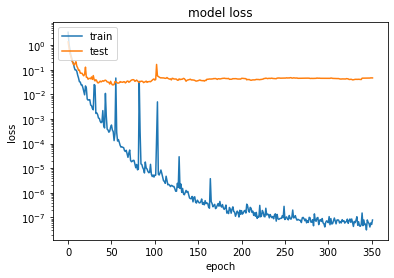

In [15]:
## summarize history for loss
## Plotting the loss with the number of iterations
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

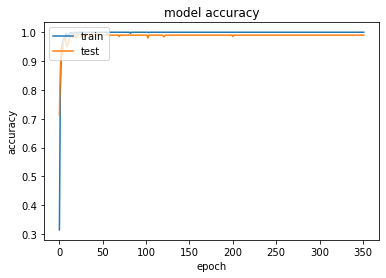

In [16]:
## Plotting the error with the number of iterations
## With each iteration the error reduces smoothly
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
## read test file
test = pd.read_csv('./input/test.csv')
index = test.pop('id')

## we need to perform the same transformations from the training set to the test set
test = preprocessing.MinMaxScaler().fit(test).transform(test)
test = StandardScaler().fit(test).transform(test)
yPred = model.predict_proba(test)

In [18]:
## Converting the test predictions in a dataframe as depicted by sample submission
yPred = pd.DataFrame(yPred,index=index,columns=sort(parent_data.species.unique()))

In [19]:
## write submission to file
fp = open('submission_nn_kernel.csv','w')
fp.write(yPred.to_csv())

## print run time
end = time.time()
print(round((end-start),2), "seconds")

28.32 seconds
